,INCIDENT INFO,Longitude,Latitude,DewPoint,RelativeHumidity,WindDirection,WindSpeed,Visibility,Pressure,Weather
0,Falconridge Drive b/w Falconridge Boulevard an...,-113.952457,51.098632,-8.2,71,21,12,24.1,88.37,Mainly Clear
1,Falconridge Drive b/w Falsbridge Drive and Fal...,-113.952505,51.098657,-8.2,71,21,12,24.1,88.37,Mainly Clear
2,Falconridge Cr and Falconridge Drive NE,-113.952495,51.098661,-8.2,71,21,12,24.1,88.37,Mainly Clear
3,James Mckevitt Road and 162 Avenue SW,-114.098963,50.905248,-8.8,70,20,9,24.1,88.46,Mostly Cloudy
4,162 Avenue and Somercrest Street SW,-114.089486,50.903918,-8.8,70,20,9,24.1,88.46,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
16957,Northbound Deerfoot Trail at McKnight Boulevar...,-114.047814,51.096148,-10,65,35,6,64.4,89.91,Mostly Cloudy
16958,58 Avenue and 2 Street SW,-114.068609,51.001377,-10,65,35,6,64.4,89.91,Mostly Cloudy
16965,Southbound Symons Valley Road at Kincora Glen ...,-114.129824,51.165068,-17.6,59,21,14,64.4,89.52,Mainly Clear
16967,Stoney Trail at Chaparral Boulevard SE,-114.025651,50.888942,-18.9,81,21,12,64.4,89.75,Clear


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


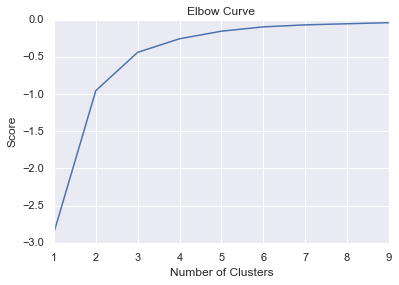

[[  51.14655025 -113.96018729]
 [  51.03322009 -113.96283029]
 [  51.0831482  -113.95713274]]


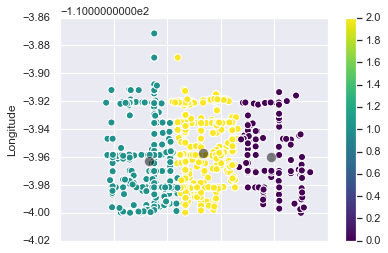

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

os.chdir("C:\dataset")
df = pd.read_csv("TrafficIn2.csv")

df = df.loc[:,['INCIDENT INFO','Longitude','Latitude','DewPoint','RelativeHumidity','WindDirection','WindSpeed','Visibility','Pressure','Weather']]
df = df.dropna()

display(df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os 

HOR = 50.99
VER = -114.0



NE = df[df.Latitude > HOR]
NE = NE[NE.Longitude > VER]

Y_axis = NE[['Latitude']]
X_axis = NE[['Longitude']]

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]


#Estimate 
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)

X=NE.loc[:,['INCIDENT INFO','Latitude','Longitude']]




plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

X = X[['INCIDENT INFO','cluster_label']]

#nwdata = df.merge(X, left_on='INCIDENT INFO', right_on='INCIDENT INFO')

#nwdata.to_csv ('NEdata.csv', index=None, header = True)

centers = kmeans.cluster_centers_
print(centers)